# Data Preparation for Streamlit
Merge the following data into one big, comprehensive dataset containing:
- ID (u, v, key) and geometry
- Indices, SU, MU components
- Geofabrik tags and other features

In [2]:
import pandas as pd
import geopandas as gpd

In [16]:
# Load files
dfb = pd.read_csv('FINAL_bike_discomfort_components.csv')
dfw = pd.read_csv('FINAL_walk_discomfort_components.csv')
gb = gpd.read_file('geofabrik_bike_graph_edges_w_EDSAaccidents.geojson')
gw = gpd.read_file('geofabrik_walk_graph_edges_w_EDSAaccidents.geojson')

In [17]:
# Merge dataframes and turn to geo
geo_columns = ['u','v','key','geometry', 'osmid']
bike = gpd.GeoDataFrame(dfb.merge(gb[geo_columns],how='left', on=['u','v','key']))
walk = gpd.GeoDataFrame(dfw.merge(gw[geo_columns], how='left', on=['u','v','key']))

<Axes: >

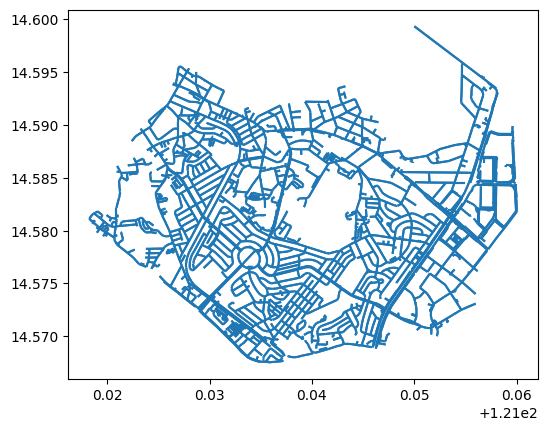

In [18]:
bike.plot()

In [19]:
bike.shape

(14878, 55)

<Axes: >

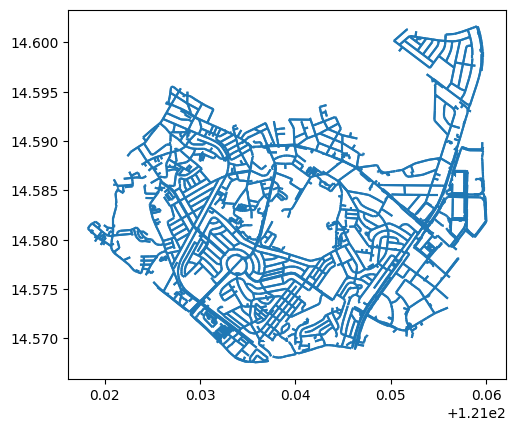

In [20]:
walk.plot()

In [21]:
dfs = [bike,walk]
for df in dfs:
    cols = df.columns.tolist()
    for col in cols:
        prefix = col.split('_')[0]
        if prefix in ['SU','MU']:
            mx = df[col].max()
            df[col] = (mx + (-1 * df[col]))
        if prefix == 'score':
            mx = df[col].max()
            df[col] = (mx + (-1 * df[col]))
            new_mn, new_mx = df[col].min(), df[col].max()
            df[col] = (10 * (df[col]-new_mn)/(new_mx-new_mn))

In [22]:
bike.score_weighted_by_main

0        7.418246
1        2.863153
2        7.418246
3        7.418246
4        2.863153
           ...   
14873    4.017376
14874    4.017376
14875    4.017376
14876    8.597416
14877    8.597416
Name: score_weighted_by_main, Length: 14878, dtype: float64

In [23]:
walk.shape

(15332, 53)

In [24]:
bike.dtypes

u                                          int64
v                                          int64
key                                        int64
score_weighted_by_main                   float64
score_weighted_by_sub                    float64
SU_bicycle                               float64
SU_CYCLEWAY_CLASS                        float64
SU_CYCLEWAY_LANE_TYPE                    float64
SU_foot                                  float64
SU_highway                               float64
SU_ALLEY                                 float64
SU_width                                 float64
SU_lit                                   float64
SU_maxspeed                              float64
SU_segregated                            float64
SU_sidewalk                              float64
SU_PARKING_SUBTAGS                       float64
SU_TAG_crossing                          float64
SU_EDSA_accident_component               float64
SU_motor_vehicle                         float64
SU_FROM_IMAGES_cycli

In [40]:
bike[bike.sidewalk_description == 'has_sidewalk'].shape[0]

5950

In [25]:
# Export
bike.to_file('streamlit_final_bike.geojson', index=False)
walk.to_file('streamlit_final_walk.geojson', index=False)

In [35]:
bike.geometry

0        LINESTRING (121.02668 14.59383, 121.02643 14.5...
1        LINESTRING (121.02668 14.59383, 121.02674 14.5...
2        LINESTRING (121.02691 14.59376, 121.02668 14.5...
3        LINESTRING (121.02668 14.59383, 121.02643 14.5...
4        LINESTRING (121.02674 14.5941, 121.02681 14.59...
                               ...                        
14873    LINESTRING (121.05634 14.58198, 121.05637 14.5...
14874    LINESTRING (121.05641 14.58202, 121.05703 14.5...
14875    LINESTRING (121.05637 14.58201, 121.05641 14.5...
14876    LINESTRING (121.03905 14.58769, 121.03953 14.5...
14877    LINESTRING (121.03896 14.58769, 121.03905 14.5...
Name: geometry, Length: 14878, dtype: geometry

In [36]:
# View column intersection 
b = bike.columns.tolist()
w = walk.columns.tolist()
itn = [x for x in b if x in w]

sorted(itn)

['MU_accident_risk',
 'MU_attractiveness',
 'MU_convenience',
 'MU_traffic_volume',
 'SU_ALLEY',
 'SU_EDSA_accident_component',
 'SU_FROM_IMAGES_greenery_ratio',
 'SU_FROM_IMAGES_road_condition',
 'SU_PARKING_SUBTAGS',
 'SU_TAG_crossing',
 'SU_foot',
 'SU_highway',
 'SU_lit',
 'SU_maxspeed',
 'SU_motor_vehicle',
 'SU_segregated',
 'SU_sidewalk',
 'SU_width',
 'bicycle_status',
 'crossing_tag_comp',
 'cycleway_class',
 'cycleway_description',
 'cycleway_lane_type',
 'cycleway_left_class',
 'cycleway_left_lane_type',
 'cycleway_right_class',
 'cycleway_right_lane_type',
 'edsa_accident_comp',
 'geometry',
 'has_left_sidewalk_status',
 'has_right_sidewalk_status',
 'is_crossing_status',
 'key',
 'lit_comp',
 'maxspeed_comp',
 'motor_vehicle_comp',
 'osmid',
 'parking_left_description',
 'parking_right_description',
 'score_weighted_by_main',
 'score_weighted_by_sub',
 'segregated_comp',
 'sidewalk_description',
 'u',
 'v',
 'width_comp']

In [44]:
sorted(gb.columns.tolist())

['EDSA_accidents',
 'HAS_TAG',
 'TAG_FIXME',
 'TAG_abutters',
 'TAG_access:conditional',
 'TAG_access:lanes',
 'TAG_admin_level',
 'TAG_alt_name',
 'TAG_barrier:personnel',
 'TAG_bridge:name',
 'TAG_bridge:structure',
 'TAG_bus',
 'TAG_bus:lanes',
 'TAG_change:lanes',
 'TAG_check_date',
 'TAG_conveying',
 'TAG_covered',
 'TAG_crossing',
 'TAG_crossing:island',
 'TAG_crossing:markings',
 'TAG_crossing:signals',
 'TAG_crossing_ref',
 'TAG_cycleway:both',
 'TAG_cycleway:lane',
 'TAG_cycleway:left',
 'TAG_cycleway:right',
 'TAG_cycleway:separation:both',
 'TAG_cycleway:separation:left',
 'TAG_cycleway:smoothness',
 'TAG_description',
 'TAG_designation',
 'TAG_destination',
 'TAG_destination:forward',
 'TAG_destination:lanes',
 'TAG_destination:ref',
 'TAG_destination:street',
 'TAG_direction:forward',
 'TAG_double_tracked_motor_vehicle',
 'TAG_driveway',
 'TAG_driving_side',
 'TAG_embankment',
 'TAG_fine:foot',
 'TAG_fine:not:bus',
 'TAG_fixme',
 'TAG_flood_prone',
 'TAG_golf',
 'TAG_golf_

In [45]:
bike.columns

Index(['u', 'v', 'key', 'score_weighted_by_main', 'score_weighted_by_sub',
       'SU_bicycle', 'SU_CYCLEWAY_CLASS', 'SU_CYCLEWAY_LANE_TYPE', 'SU_foot',
       'SU_highway', 'SU_ALLEY', 'SU_width', 'SU_lit', 'SU_maxspeed',
       'SU_segregated', 'SU_sidewalk', 'SU_PARKING_SUBTAGS', 'SU_TAG_crossing',
       'SU_EDSA_accident_component', 'SU_motor_vehicle',
       'SU_FROM_IMAGES_cycling_lane_coverage', 'SU_FROM_IMAGES_greenery_ratio',
       'SU_FROM_IMAGES_has_bicycle', 'SU_FROM_IMAGES_road_condition',
       'MU_DISMOUNT', 'MU_convenience', 'MU_attractiveness',
       'MU_traffic_safety', 'MU_security', 'MU_accident_risk',
       'MU_traffic_volume', 'MU_safety_of_sidewalks_and_crossings',
       'sidewalk_description', 'has_left_sidewalk_status',
       'has_right_sidewalk_status', 'is_crossing_status', 'bicycle_status',
       'cycleway_lane_type', 'cycleway_description', 'cycleway_left_lane_type',
       'cycleway_right_lane_type', 'cycleway_class', 'cycleway_left_class',
       